In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to C:\Users\Aniket
[nltk_data]     Ratnaparakhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load DataSet Spam.csv

In [3]:
df_spamsms = pd.read_csv('C:\\Users\\Aniket Ratnaparakhi\\Downloads\\spam.csv')
df_spamsms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Remove Unknown Feature

In [4]:
df_spamsms = df_spamsms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
df_spamsms = df_spamsms.rename(columns={"v1":"label", "v2":"sms"})

In [6]:
df_spamsms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df_spamsms.groupby('label').describe()

sms                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [8]:
df_spamsms.shape

(5572, 2)

In [9]:
df_spamsms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df_spamsms.isna().sum()

label    0
sms      0
dtype: int64

In [11]:
df_spamsms['length'] = df_spamsms['sms'].apply(len)
df_spamsms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df=df_spamsms

## Visualization

<AxesSubplot:>

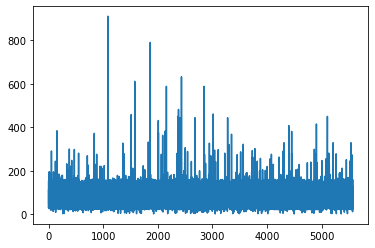

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df_spamsms['length'].plot(kind='line')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

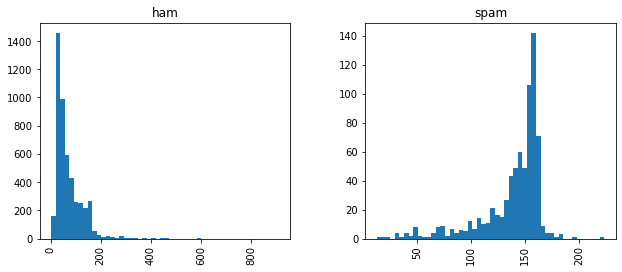

In [14]:
df_spamsms.hist(column='length', by='label', bins=50,figsize=(10,4))

<AxesSubplot:>

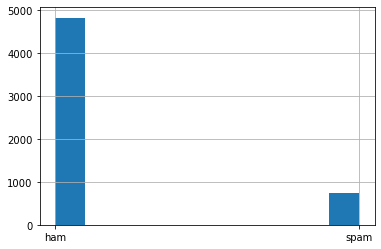

In [15]:
df.label.hist()

In [16]:
df_spamsms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
df.shape

(5572, 3)

## Text Visualization

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

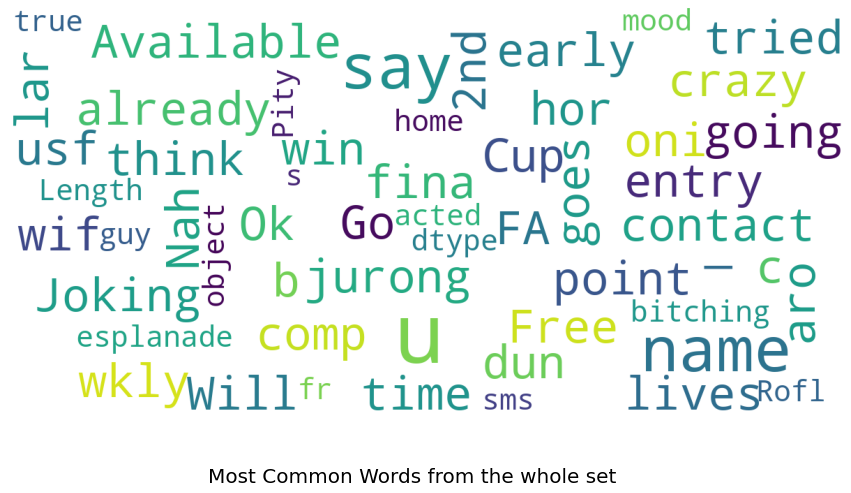

In [20]:
show_wordcloud(df['sms'],'Most Common Words from the whole set')

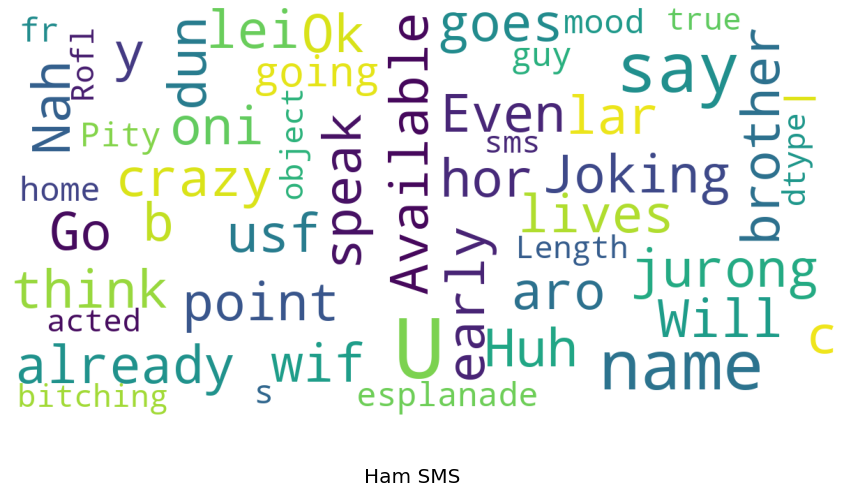

In [21]:
show_wordcloud(df[df['label'] == 'ham']['sms'],'Ham SMS')

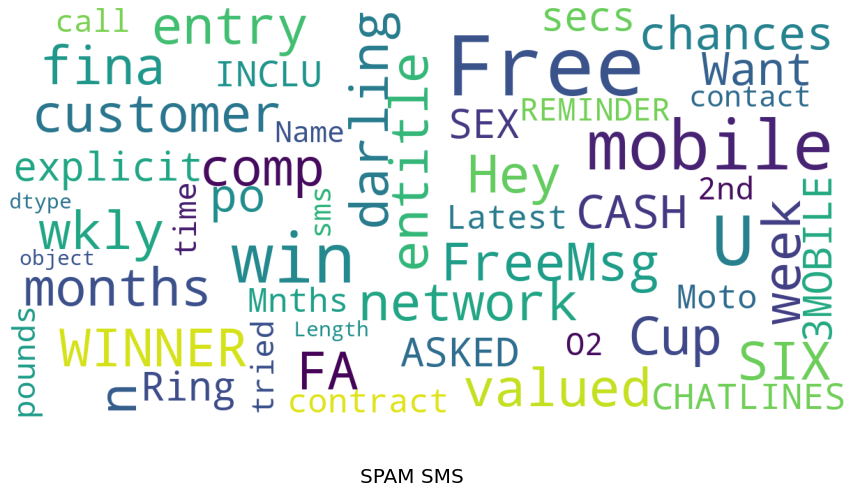

In [22]:
show_wordcloud(df[df['label'] == 'spam']['sms'],'SPAM SMS')

## Data Is not balanced so we use Downsampling 

<AxesSubplot:xlabel='label', ylabel='count'>

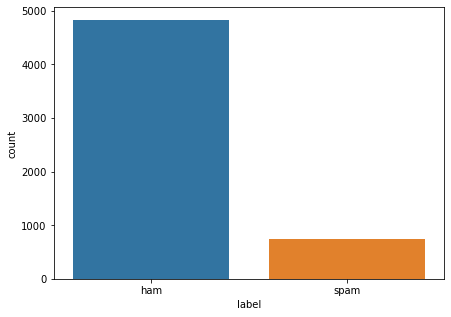

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(df.label)

In [24]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(5169, 3)

In [25]:
ham_msg = df[df.label == 'ham']
spam_msg = df[df.label == 'spam']

In [26]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape,spam_msg_df.shape)

(653, 3) (653, 3)


Text(0.5, 0, 'Message types')

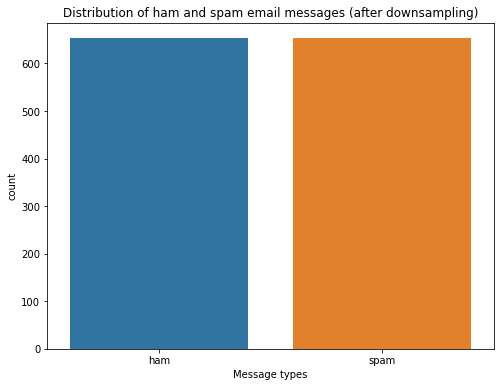

In [27]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [28]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape,spam_msg_df.shape)

(653, 3) (653, 3)


## Data Cleaning and Preprocessing

In [29]:
msg_df['label']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['label'].values
msg_df

,label,sms,length
0,0,If u laugh really loud.. If u talk spontaneous...,156
1,0,645,3
2,0,How do you guys go to see movies on your side.,46
3,0,Pls help me tell sura that i'm expecting a bat...,139
4,0,Oh ho. Is this the first time u use these type...,55
...,...,...,...
1301,1,Want explicit SEX in 30 secs? Ring 02073162414...,90
1302,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1303,1,Had your contract mobile 11 Mnths? Latest Moto...,160
1304,1,REMINDER FROM O2: To get 2.50 pounds free call...,147


### Remove Emails,Web address, extra spaces

In [30]:
msg_df['sms'] = msg_df['sms'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

In [31]:
msg_df['sms'] = msg_df['sms'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [32]:
msg_df['sms'] = msg_df['sms'].str.replace(r'\s+', ' ')

In [33]:
msg_df['sms'] = msg_df['sms'].str.lower()

In [34]:
msg_df['sms'] = msg_df['sms'].str.replace('\d+', '')

In [35]:
msg_df

,label,sms,length
0,0,if u laugh really loud.. if u talk spontaneous...,156
1,0,,3
2,0,how do you guys go to see movies on your side.,46
3,0,pls help me tell sura that i'm expecting a bat...,139
4,0,oh ho. is this the first time u use these type...,55
...,...,...,...
1301,1,want explicit sex in secs? ring now! costs p...,90
1302,1,asked mobile if chatlines inclu in free mins....,158
1303,1,had your contract mobile mnths? latest motoro...,160
1304,1,reminder from o: to get . pounds free call cre...,147


In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
msg_df['sms_re_punct']=msg_df['sms'].apply(lambda x: remove_punctuation(x))
msg_df.head()

,label,sms,length,sms_re_punct
0,0,if u laugh really loud.. if u talk spontaneous...,156,if u laugh really loud if u talk spontaneously...
1,0,,3,
2,0,how do you guys go to see movies on your side.,46,how do you guys go to see movies on your side
3,0,pls help me tell sura that i'm expecting a bat...,139,pls help me tell sura that im expecting a batt...
4,0,oh ho. is this the first time u use these type...,55,oh ho is this the first time u use these type ...


In [38]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [39]:
# msg_df=msg_df.drop('sms_punct_stopword',axis=1)

In [40]:
msg_df

,label,sms,length,sms_re_punct
0,0,if u laugh really loud.. if u talk spontaneous...,156,if u laugh really loud if u talk spontaneously...
1,0,,3,
2,0,how do you guys go to see movies on your side.,46,how do you guys go to see movies on your side
3,0,pls help me tell sura that i'm expecting a bat...,139,pls help me tell sura that im expecting a batt...
4,0,oh ho. is this the first time u use these type...,55,oh ho is this the first time u use these type ...
...,...,...,...,...
1301,1,want explicit sex in secs? ring now! costs p...,90,want explicit sex in secs ring now costs pmi...
1302,1,asked mobile if chatlines inclu in free mins....,158,asked mobile if chatlines inclu in free mins ...
1303,1,had your contract mobile mnths? latest motoro...,160,had your contract mobile mnths latest motorol...
1304,1,reminder from o: to get . pounds free call cre...,147,reminder from o to get pounds free call credi...


In [41]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
msg_df['sms_puct_stopword'] = msg_df['sms_re_punct'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [42]:
msg_df=msg_df.drop('sms',axis=1)
msg_df

,label,length,sms_re_punct,sms_puct_stopword
0,0,156,if u laugh really loud if u talk spontaneously...,u laugh really loud u talk spontaneously u don...
1,0,3,,
2,0,46,how do you guys go to see movies on your side,guys go see movies side
3,0,139,pls help me tell sura that im expecting a batt...,pls help tell sura im expecting battery hont p...
4,0,55,oh ho is this the first time u use these type ...,oh ho first time u use type words
...,...,...,...,...
1301,1,90,want explicit sex in secs ring now costs pmi...,want explicit sex secs ring costs pmin gsex po...
1302,1,158,asked mobile if chatlines inclu in free mins ...,asked mobile chatlines inclu free mins india c...
1303,1,160,had your contract mobile mnths latest motorol...,contract mobile mnths latest motorola nokia et...
1304,1,147,reminder from o to get pounds free call credi...,reminder get pounds free call credit details g...


In [43]:
ss = nltk.SnowballStemmer("english")
msg_df['sms_puct_stopword_steam'] = msg_df['sms_puct_stopword'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))

In [44]:
msg_df=msg_df.drop('sms_re_punct',axis=1)
msg_df

,label,length,sms_puct_stopword,sms_puct_stopword_steam
0,0,156,u laugh really loud u talk spontaneously u don...,u laugh realli loud u talk spontan u dont care...
1,0,3,,
2,0,46,guys go see movies side,guy go see movi side
3,0,139,pls help tell sura im expecting battery hont p...,pls help tell sura im expect batteri hont pls ...
4,0,55,oh ho first time u use type words,oh ho first time u use type word
...,...,...,...,...
1301,1,90,want explicit sex secs ring costs pmin gsex po...,want explicit sex sec ring cost pmin gsex pobo...
1302,1,158,asked mobile chatlines inclu free mins india c...,ask mobil chatlin inclu free min india cust se...
1303,1,160,contract mobile mnths latest motorola nokia et...,contract mobil mnths latest motorola nokia etc...
1304,1,147,reminder get pounds free call credit details g...,remind get pound free call credit detail great...


In [45]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
msg_df['sms_punct_token']=msg_df['sms_puct_stopword_steam'].apply(lambda x: tokenize(x.lower()))
msg_df.head()

,label,length,sms_puct_stopword,sms_puct_stopword_steam,sms_punct_token
0,0,156,u laugh really loud u talk spontaneously u don...,u laugh realli loud u talk spontan u dont care...,"[u, laugh, realli, loud, u, talk, spontan, u, ..."
1,0,3,,,[]
2,0,46,guys go see movies side,guy go see movi side,"[guy, go, see, movi, side]"
3,0,139,pls help tell sura im expecting battery hont p...,pls help tell sura im expect batteri hont pls ...,"[pls, help, tell, sura, im, expect, batteri, h..."
4,0,55,oh ho first time u use type words,oh ho first time u use type word,"[oh, ho, first, time, u, use, type, word]"


In [46]:
sms_df = msg_df['sms_puct_stopword_steam']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
    
all_words = nltk.FreqDist(all_words)  

In [47]:
all_words.items()

dict_items([('u', 245), ('laugh', 2), ('realli', 9), ('loud', 1), ('talk', 9), ('spontan', 1), ('dont', 45), ('care', 14), ('other', 2), ('feel', 14), ('probabl', 7), ('dear', 29), ('amp', 5), ('best', 17), ('friend', 23), ('goodeven', 1), ('guy', 13), ('go', 99), ('see', 34), ('movi', 8), ('side', 2), ('pls', 16), ('help', 22), ('tell', 26), ('sura', 1), ('im', 72), ('expect', 3), ('batteri', 2), ('hont', 1), ('send', 77), ('messag', 49), ('download', 10), ('thank', 31), ('oh', 16), ('ho', 2), ('first', 17), ('time', 51), ('use', 20), ('type', 4), ('word', 22), ('could', 17), ('work', 22), ('well', 22), ('reach', 13), ('consensus', 1), ('next', 22), ('meet', 26), ('want', 46), ('sent', 17), ('ltgt', 36), ('mesag', 1), ('today', 50), ('that', 16), ('sorri', 13), ('hurt', 2), ('avail', 4), ('soire', 2), ('june', 3), ('rd', 1), ('usf', 2), ('guess', 11), ('might', 3), ('take', 33), ('car', 3), ('hello', 7), ('handsom', 2), ('find', 30), ('job', 4), ('lazi', 2), ('toward', 3), ('get', 130

In [48]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 3276


### Using TfidfVectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(all_words)
import pickle
#serializing our model to a file called model.pkl
pickle.dump(tfidf_model, open("sms_spam_model.pkl","wb"))
tfidf_data=pd.DataFrame(tfidf_vec.toarray())

In [50]:
tfidf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

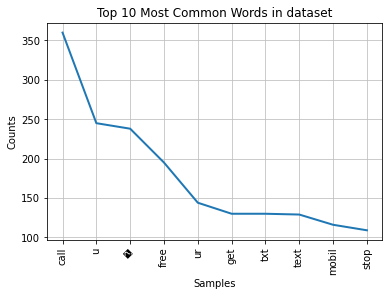

In [51]:
all_words.plot(10, title='Top 10 Most Common Words in dataset');

In [52]:

msg_df

,label,length,sms_puct_stopword,sms_puct_stopword_steam,sms_punct_token
0,0,156,u laugh really loud u talk spontaneously u don...,u laugh realli loud u talk spontan u dont care...,"[u, laugh, realli, loud, u, talk, spontan, u, ..."
1,0,3,,,[]
2,0,46,guys go see movies side,guy go see movi side,"[guy, go, see, movi, side]"
3,0,139,pls help tell sura im expecting battery hont p...,pls help tell sura im expect batteri hont pls ...,"[pls, help, tell, sura, im, expect, batteri, h..."
4,0,55,oh ho first time u use type words,oh ho first time u use type word,"[oh, ho, first, time, u, use, type, word]"
...,...,...,...,...,...
1301,1,90,want explicit sex secs ring costs pmin gsex po...,want explicit sex sec ring cost pmin gsex pobo...,"[want, explicit, sex, sec, ring, cost, pmin, g..."
1302,1,158,asked mobile chatlines inclu free mins india c...,ask mobil chatlin inclu free min india cust se...,"[ask, mobil, chatlin, inclu, free, min, india,..."
1303,1,160,contract mobile mnths latest motorola nokia et...,contract mobil mnths latest motorola nokia etc...,"[contract, mobil, mnths, latest, motorola, nok..."
1304,1,147,reminder get pounds free call credit details g...,remind get pound free call credit detail great...,"[remind, get, pound, free, call, credit, detai..."


In [53]:
#slicing
df_train = tfidf_data.iloc[:1305]
df_test = tfidf_data.iloc[1305:]

In [54]:
target = msg_df['label']
df_train['label'] = target

Y = df_train['label']     
X = df_train.drop('label',axis=1)

## Splitting data 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=3)

## Applying NaiveBayes

In [57]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [59]:
y_NB = naive_bayes.predict(X_test)

In [60]:
confusion_matrix(y_test,y_NB)

array([[  0, 150],
       [  1, 110]], dtype=int64)

In [61]:
naive_bayes.score(X_test,y_test) 


0.421455938697318

## LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
Spam_model = LogisticRegression()
Spam_model.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_LR = Spam_model.predict(X_test)
accuracy_score(y_test,y_LR)

0.421455938697318

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

## Apply NaiveBayes PipeLine

In [66]:
X_trainNew, X_test_New, y_train_New, y_test_New = train_test_split(msg_df['sms_puct_stopword_steam'], msg_df['label'], test_size=0.20, random_state=3)

In [67]:
from sklearn.pipeline import Pipeline
NBP = Pipeline([('vectorizer', CountVectorizer()),('nb',MultinomialNB())])

In [68]:
NBP.fit(X_trainNew,y_train_New)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [69]:
NB1 = NBP.score(X_test_New,y_test_New)
NB1

0.916030534351145

In [70]:
y_NBP = NBP.predict(X_test_New)

In [71]:
confusion_matrix(y_test_New,y_NBP)

array([[134,  16],
       [  6, 106]], dtype=int64)

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test_New,y_NBP).ravel()

In [73]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test_New, y_NBP)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test_New, y_NBP)))

Precision: 86.89%
Recall: 94.64%


In [74]:
print(classification_report(y_test_New,y_NBP))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.87      0.95      0.91       112

    accuracy                           0.92       262
   macro avg       0.91      0.92      0.92       262
weighted avg       0.92      0.92      0.92       262



## Apply RandomForest

In [75]:
# import pickle
# filename = 'finalized_model.pkl'
# pickle.dump(clf, open(filename, 'wb'))

In [76]:
# model = pickle.load(open('finalized_model.pkl','rb'))
# model.predict(["hi aniket i call u back"])

In [77]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [78]:
y_RF_predict = classifier.predict(X_test)

In [79]:
RF1 = accuracy_score(y_test,y_RF_predict)
RF1

0.5708812260536399

### Apply SVM

In [80]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [81]:
SVC_predict = svc.predict(X_test)

In [82]:
SVC1 = accuracy_score(y_test,SVC_predict)
SVC1

0.5747126436781609

### Using CountVectorizer

In [83]:
msg_df.head()

,label,length,sms_puct_stopword,sms_puct_stopword_steam,sms_punct_token
0,0,156,u laugh really loud u talk spontaneously u don...,u laugh realli loud u talk spontan u dont care...,"[u, laugh, realli, loud, u, talk, spontan, u, ..."
1,0,3,,,[]
2,0,46,guys go see movies side,guy go see movi side,"[guy, go, see, movi, side]"
3,0,139,pls help tell sura im expecting battery hont p...,pls help tell sura im expect batteri hont pls ...,"[pls, help, tell, sura, im, expect, batteri, h..."
4,0,55,oh ho first time u use type words,oh ho first time u use type word,"[oh, ho, first, time, u, use, type, word]"


In [84]:
data_train, data_test, labels_train, labels_test = train_test_split(msg_df.sms_puct_stopword_steam,msg_df.label,test_size=0.2,random_state=0) 

In [85]:
vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

In [86]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [87]:
print ("Accuracy Score : ", accuracy_score(labels_test, predictions))

Accuracy Score :  0.9198473282442748


## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
DFC = DecisionTreeClassifier(random_state=1000)

In [90]:
DFC.fit(data_train_count, labels_train)

DecisionTreeClassifier(random_state=1000)

In [91]:
y_DFC = DFC.predict(data_test_count)
DT1 = accuracy_score(labels_test, y_DFC)
print("Decision Tree Accuracy Score :",accuracy_score(labels_test, y_DFC))

Decision Tree Accuracy Score : 0.8778625954198473


## XGBoost

In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBClassifier

In [97]:
XGC = XGBClassifier(random_state = 1000)

In [98]:
XGC.fit(data_train_count, labels_train)

[00:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=1000, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [99]:
y_XGB = XGC.predict(data_test_count)
XG1 = accuracy_score(labels_test, y_XGB)
print("XGBoost Classifier Accuracy Score :",accuracy_score(labels_test, y_XGB))

XGBoost Classifier Accuracy Score : 0.9083969465648855


In [100]:
from sklearn.ensemble import RandomForestClassifier  
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier1.fit(data_train_count, labels_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [101]:
y_RF_predict1 = classifier1.predict(data_test_count)

In [102]:
RF1 = accuracy_score(labels_test, y_RF_predict1)
print ("accuracy_score : ", accuracy_score(labels_test, y_RF_predict1))

accuracy_score :  0.9045801526717557


In [103]:
print(classification_report(labels_test,y_RF_predict1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       130
           1       0.97      0.84      0.90       132

    accuracy                           0.90       262
   macro avg       0.91      0.91      0.90       262
weighted avg       0.91      0.90      0.90       262



In [104]:
AA = np.array([NB1,SVC1,DT1,XG1,RF1])
labels1 = ['Naive Bayes','SVM','Decision Trees','XGBoost','Random Forest']
total=sum(AA)

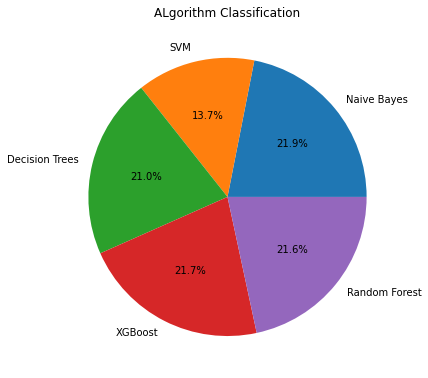

In [105]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(AA, labels=labels1, autopct='%.1f%%')
ax.set_title('ALgorithm Classification')
plt.tight_layout()

In [106]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [107]:
msg = ["Hi! You are pre-qualified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "]
msg1=['Hurry up free mobile shop now!']
msg2=['hello i am atish']
if NBP.predict(msg1):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!
